# Models to predict the mortality of sepsis patients

In [65]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import datetime
from time import time
import import_ipynb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#import visuals as vs


## Extracting the clean data  

In [66]:
import os
os.getcwd()
os.chdir(r'C:\Users\skura\Desktop\HAP\Project')
labevents = pd.read_csv(r'clean_sepsis_feature_list.csv')

sepsis_features = pd.read_csv('clean_sepsis_feature_list.csv')

In [67]:
sepsis_features.columns

Index(['Unnamed: 0', 'subject_id', 'hadm_id', 'Alanine Aminotransferase (ALT)',
       'Alkaline Phosphatase', 'Anion Gap', 'Asparate Aminotransferase (AST)',
       'Basophils', 'Bicarbonate', 'Bilirubin, Total', 'Calcium, Total',
       'Chloride', 'Creatinine', 'Eosinophils', 'Glucose', 'Hematocrit',
       'Hemoglobin', 'INR(PT)', 'Lactate', 'Lymphocytes', 'MCH', 'MCHC', 'MCV',
       'Magnesium', 'Monocytes', 'Neutrophils', 'PT', 'PTT', 'Phosphate',
       'Platelet Count', 'Potassium', 'RDW', 'Red Blood Cells', 'Sodium',
       'Specific Gravity', 'Urea Nitrogen', 'White Blood Cells', 'pH',
       'admission_type', 'insurance', 'ethnicity', 'death_period', 'gender',
       'age', 'BLOOD CULTURE', 'MRSA SCREEN', 'SPUTUM', 'STOOL', 'SWAB',
       'URINE', 'num_of_infections'],
      dtype='object')

In [68]:
sepsis_features.drop(['Unnamed: 0'],axis=1,inplace=True)

In [69]:
sepsis_features.head()

,subject_id,hadm_id,Alanine Aminotransferase (ALT),Alkaline Phosphatase,Anion Gap,Asparate Aminotransferase (AST),Basophils,Bicarbonate,"Bilirubin, Total","Calcium, Total",...,death_period,gender,age,BLOOD CULTURE,MRSA SCREEN,SPUTUM,STOOL,SWAB,URINE,num_of_infections
0,21,111970,47.000000,167.000000,17.0,82.000000,0.00,23.50,0.300000,7.700000,...,1,M,87,1,0,0,1,0,0,2
1,94,183686,90.333333,68.666667,14.0,82.333333,0.85,23.25,1.033333,8.075000,...,0,M,74,0,0,0,0,0,0,0
2,157,107880,13.000000,118.000000,17.4,25.000000,0.00,18.00,0.600000,7.940000,...,0,M,80,0,0,0,0,0,2,3
3,166,128219,94.822544,141.192150,19.0,148.710368,0.00,24.00,1.501629,7.903004,...,1,F,91,1,0,0,0,0,0,1
4,188,191517,121.000000,130.000000,15.0,114.000000,0.00,17.00,1.775000,7.725000,...,0,M,51,0,0,0,0,0,0,0


In [70]:
sepsis_features.num_of_infections.describe()

count    1178.000000
mean        1.224109
std         1.553037
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        14.000000
Name: num_of_infections, dtype: float64

### Analyzing the co-relation and importance of all features together

### Prepare the data for machine learning models

Normalize the data such that all data points have same priorities

In [71]:
columns_to_normalize = sepsis_features.describe().columns.tolist()
columns_to_normalize.remove('subject_id')
columns_to_normalize.remove('hadm_id')
columns_to_normalize.remove('death_period')
columns_to_normalize.remove('age')

In [72]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
processed_sepsis_features = sepsis_features.copy()
processed_sepsis_features[columns_to_normalize] = scaler.fit_transform(sepsis_features[columns_to_normalize])
#processed_sepsis_features.describe().T

#### One hot encoding of all categorical features

In [73]:
processed_sepsis_features.select_dtypes(exclude=['floating','integer']).head()

,admission_type,insurance,ethnicity,gender
0,EMERGENCY,Medicare,WHITE,M
1,EMERGENCY,Medicare,ASIAN,M
2,EMERGENCY,Medicare,WHITE,M
3,EMERGENCY,Medicare,WHITE,F
4,EMERGENCY,Private,WHITE,M


In [74]:
processed_sepsis_features = pd.get_dummies(processed_sepsis_features)
print(len(processed_sepsis_features.columns))
#print(processed_sepsis_features.columns)

80


### Shuffle and Split Data

Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 90% of the data will be used for training and 10% for testing. We are doing 90% and 10% because our dataset is small.

In [75]:
# Import train_test_split
from sklearn.model_selection import train_test_split


tr, ts = train_test_split(processed_sepsis_features, test_size=0.2)

In [76]:
cls = list(processed_sepsis_features.columns)
cls.remove('subject_id')
cls.remove('hadm_id')
cls.remove('death_period')

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score


In [79]:
lr = LogisticRegression(solver='lbfgs', C=0.9, max_iter=1000)
lr.fit(tr[cls],tr['death_period'])
probs = lr.predict_proba(ts[cls])[:,1]
fpr,tpr,thresholds = roc_curve(ts['death_period'],probs)
auc(fpr,tpr)

0.7973453177257526

## Sensitvity Analysis

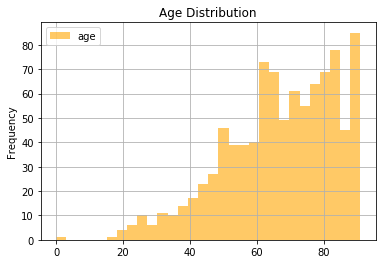

In [18]:
ax = tr[['age']].plot(kind='hist', title ="Age Distribution", legend=True, grid=True, bins=30, color='orange', alpha=0.6)

In [80]:
x =ts['age'].unique()
#x.sort()
#x = [i for i in x if i >= 60]
x.sort()

In [81]:
y =tr['age'].unique()
#y.sort()
#y = [i for i in y if i >= 60]
y.sort()

In [82]:
dist = []
#dist1 = []
for a in list(x):
    tt = ts[ts['age'] == a]
    dist.append( lr.predict_proba(tt[cls])[:,1].mean())


#plt.plot(list(x),dist)

In [83]:
#dist = []
dist1 = []
for a in list(y):
    tt = tr[tr['age'] == a]
    dist1.append( lr.predict_proba(tt[cls])[:,1].mean())


#plt.plot(list(y),dist1)

## check how input factor changes the model prediction

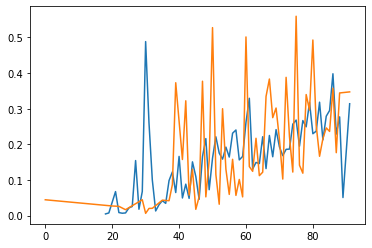

In [84]:
plt.plot(list(y),dist1)
plt.plot(list(x),dist)
plt.show()

In [23]:
lr = LogisticRegression(solver='lbfgs', C=0.9, max_iter=1000)
lr.fit(tr1[cls],tr1['death_period'])
probs = lr.predict_proba(ts[cls])[:,1]
fpr,tpr,thresholds = roc_curve(ts['death_period'],probs)
auc(fpr,tpr)

NameError: name 'tr1' is not defined

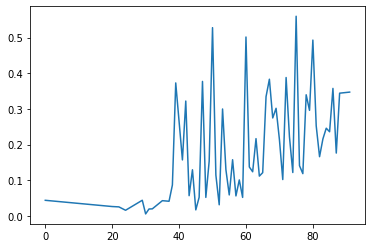

In [85]:
dist = []
dist1 = []
for a in list(x):
    tt = ts[ts['age'] == a]
    dist.append( lr.predict_proba(tt[cls])[:,1].mean())


plt.plot(list(x),dist)

In [86]:
dist = []
dist1 = []
for a in list(x):
    tt = pd.DataFrame(ts)
    tt['age'] = a
    ttt = pd.DataFrame(tr)
    ttt['age'] = a
    dist.append( lr.predict_proba(tt[cls])[:,1].mean())
    dist1.append( lr.predict_proba(ttt[cls])[:,1].mean())

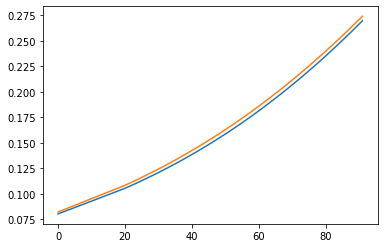

In [87]:
plt.plot(list(x),dist)
plt.plot(list(x),dist1)

In [36]:
ax = tr[['age']].plot(kind='hist', title ="Age Distribution", legend=True, grid=True, bins=30, color='orange', alpha=0.6)


LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

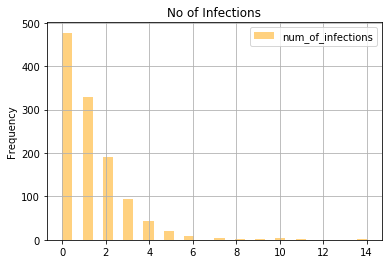

In [65]:
ax = sepsis_features[['num_of_infections']].plot(kind='hist', title ="No of Infections", legend=True, grid=True, bins=30, color='orange', alpha=0.5)

In [24]:
y=ts['age'].value_counts().sort_index().values
y

array([ 1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  3,  2,  1,  2,  1,  3,  2,
        2,  3,  3,  3,  6,  6,  2,  9,  2,  4,  1,  1,  3,  4,  1,  7,  7,
        5,  6,  7,  5,  4,  3,  2,  4,  4,  2,  4,  5,  5,  7,  6,  7,  6,
        7,  2,  7,  9,  7,  1,  3,  3,  2, 23], dtype=int64)

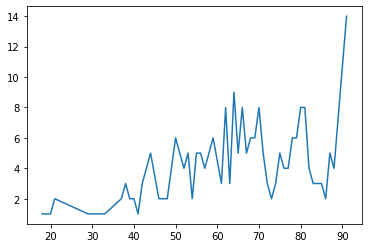

In [67]:
plt.plot(ts['age'].value_counts().sort_index().index,ts['age'].value_counts().sort_index().values)